In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [2]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [5]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [6]:
dataset['State']=dataset['State'].map({'New York':0,'California':1,'Florida':2})
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [7]:
dataset.drop(['State','Administration','Marketing Spend'],axis=1,inplace=True)

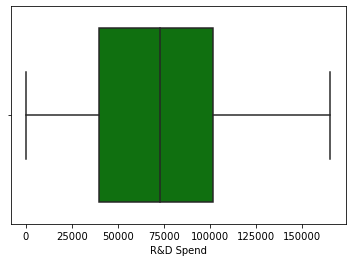

In [28]:
#handling outliers
sns.boxplot(x='R&D Spend',data=dataset,color='green',orient='h')
plt.show()

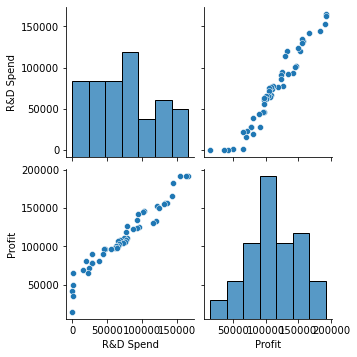

In [91]:
sns.pairplot(dataset)
plt.show()

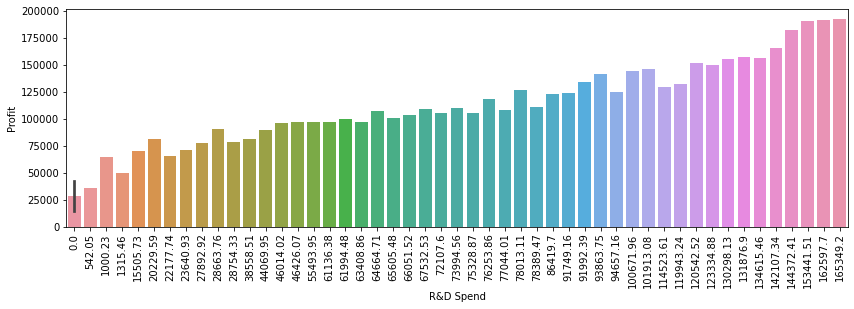

In [30]:
plt.figure(figsize=(14,4))
sns.barplot('R&D Spend','Profit',data=dataset)
plt.xticks(rotation=90)
plt.show()

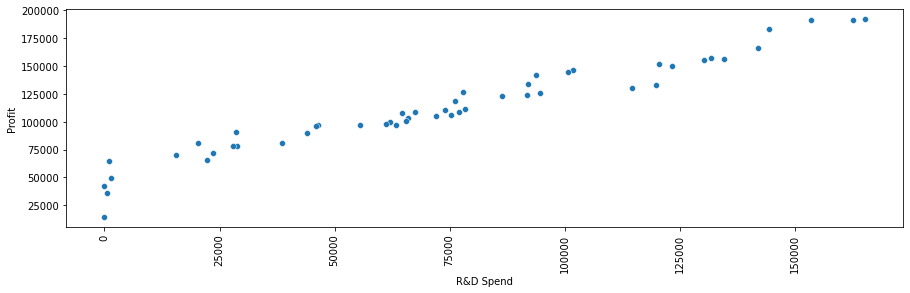

In [45]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='R&D Spend',y='Profit',data=dataset)
plt.xticks(rotation=90)
plt.show()

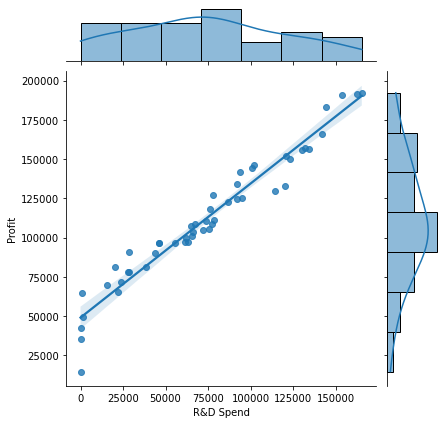

In [48]:
sns.jointplot(x='R&D Spend',y='Profit', data=dataset, kind = 'reg')

In [10]:
dataset.head()

,R&D Spend,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


In [11]:
x = dataset.iloc[:,0:1].values
y = dataset.iloc[:,-1].values

In [54]:
x

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

In [55]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [12]:
x.shape

(50, 1)

In [13]:
y.shape

(50,)

In [14]:
# split the data into training and test
# training dataset - model building
# test dataset - prediction
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 1)
(15, 1)
(35,)
(15,)


In [15]:
print(len(y_train))
print(len(x_train))

35
35


In [38]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [37]:
# Y = MX + C
# M = SLOPE
# C = Intercept
print("Co-efficient or Slope :", lin_model.coef_)
print("Intercept :", lin_model.intercept_)
print("Y = 0.87594114YearsExperience +0.87594114")

Co-efficient or Slope : [0.87594114]
Intercept : 48079.63803121852
Y = 0.87594114YearsExperience +0.87594114


In [19]:
x_test

array([[ 44069.95],
       [119943.24],
       [ 78389.47],
       [ 63408.86],
       [ 73994.56],
       [162597.7 ],
       [ 75328.87],
       [  1315.46],
       [ 23640.93],
       [     0.  ],
       [ 78013.11],
       [ 77044.01],
       [130298.13],
       [  1000.23],
       [ 91749.16]])

In [18]:
y_pred = lin_model.predict(x_test)

In [65]:
y_pred

array([ 86682.3200773 , 153142.85587686, 116744.1993972 , 103622.06686275,
       112894.51694121, 190505.652005  , 114063.29395777,  49231.90355737,
        68787.70110058,  48079.63803122, 116414.53019143, 115565.65563698,
       162213.12998183,  48955.78063322, 128446.50142623])

In [40]:
print(lin_model.score(x_train,y_train))
print(lin_model.score(x_test,y_test))

0.9431790691587317
0.9499341950108708


In [35]:
# Evaluate your model
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9499341950108708


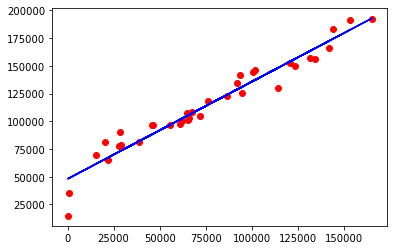

In [88]:
# visualisation
plt.scatter(x_train, y_train, color ='red')
plt.plot(x_train, lin_model.predict(x_train), color='blue')

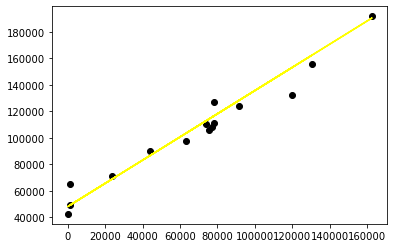

In [41]:
plt.scatter(x_test, y_test, color ='black')
plt.plot(x_test, lin_model.predict(x_test), color='yellow')
plt.show()

In [71]:
newdata = pd.read_csv('predict_50_Startups.csv')
newdata

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34
5,131876.90
6,134615.46
7,130298.13
8,120542.52
9,123334.88


In [73]:
pred_profit = lin_model.predict(newdata)

In [74]:
pred_profit

array([192915.80403943, 190505.652005  , 182485.3685392 , 174541.3707869 ,
       172557.30279903, 163596.03956838, 165994.85692452, 162213.12998183,
       153667.78988057, 156113.7328698 , 137349.49705254, 136262.3489904 ,
       130298.75779202, 128659.55658862, 153142.85587686, 148395.57902047,
       116414.53019143, 130993.73824837, 128446.50142623, 123778.20818203,
       114873.53074873, 116744.1993972 , 112894.51694121, 107234.15904514,
       115565.65563698, 104722.11753782, 114063.29395777, 111241.6510561 ,
       105936.88146399, 105546.1766799 , 102383.15323947, 101631.50815107,
       103622.06686275,  96689.07160968,  88746.14250556,  88385.21096066,
        73187.40451439,  86682.3200773 ,  65799.56806728,  81854.62306525,
        73266.73850304,  72512.19404947,  68787.70110058,  61661.74477476,
        67506.03279047,  48955.78063322,  49231.90355737,  48079.63803122,
        48554.44192374,  48079.63803122])

In [79]:
new_profit = pd.concat([newdata,pd.DataFrame(pred_profit)], axis=1)

In [83]:
new_profit

,R&D Spend,New Profit
0,165349.20,192915.804039
1,162597.70,190505.652005
2,153441.51,182485.368539
3,144372.41,174541.370787
4,142107.34,172557.302799
5,131876.90,163596.039568
6,134615.46,165994.856925
7,130298.13,162213.129982
8,120542.52,153667.789881
9,123334.88,156113.732870


In [81]:
new_profit.columns = ['R&D Spend','New Profit']

In [82]:
new_profit.to_csv("new profit_50-startup.csv")

In [28]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [22]:
dataset.groupby(['State'])['State'].count()

State
California    17
Florida       16
New York      17
Name: State, dtype: int64

In [30]:
mean_1=dataset.Profit.mean()
mean_1

112012.63920000002

In [31]:
dataset.Profit.map(lambda p: p - mean_1)

0     80249.1908
1     79779.4208
2     79037.7508
3     70889.3508
4     54175.3008
5     44978.4808
6     44109.8708
7     43739.9608
8     40199.1308
9     37747.3208
10    34109.3108
11    32246.7608
12    29572.8808
13    22294.7108
14    20590.0108
15    17904.4008
16    14980.2908
17    13357.7308
18    12254.2608
19    10764.2208
20     6461.3908
21     -699.6192
22    -1660.3892
23    -3278.6492
24    -3460.5992
25    -4608.2992
26    -6279.0992
27    -7004.3292
28    -8730.2592
29   -11007.9992
30   -12075.0492
31   -14529.0792
32   -14584.7992
33   -15233.7192
34   -15299.8392
35   -15533.1292
36   -21304.4492
37   -22063.4992
38   -30783.5792
39   -31006.8792
40   -33772.7292
41   -34213.8092
42   -40514.1492
43   -42253.6592
44   -46812.3092
45   -47086.5592
46   -62521.8892
47   -69452.9092
48   -76339.2292
49   -97331.2392
Name: Profit, dtype: float64

In [37]:
def remean_points(row):
    row.Profit = row.Profit - mean_1
    return row
    
dataset.apply(remean_points, axis='columns')

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,80249.1908
1,162597.70,151377.59,443898.53,California,79779.4208
2,153441.51,101145.55,407934.54,Florida,79037.7508
3,144372.41,118671.85,383199.62,New York,70889.3508
4,142107.34,91391.77,366168.42,Florida,54175.3008
5,131876.90,99814.71,362861.36,New York,44978.4808
6,134615.46,147198.87,127716.82,California,44109.8708
7,130298.13,145530.06,323876.68,Florida,43739.9608
8,120542.52,148718.95,311613.29,New York,40199.1308
9,123334.88,108679.17,304981.62,California,37747.3208


In [77]:
dataset.loc[[1,2,4],['Profit','State']]

,Profit,State
1,191792.06,California
2,191050.39,Florida
4,166187.94,Florida


In [81]:
dataset.loc[1:3,['Profit','State']]

,Profit,State
1,191792.06,California
2,191050.39,Florida
3,182901.99,New York


In [91]:
dataset.loc[dataset.State .isin (['California', 'Florida'])]

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
9,123334.88,108679.17,304981.62,California,149759.96
10,101913.08,110594.11,229160.95,Florida,146121.95
11,100671.96,91790.61,249744.55,California,144259.40
12,93863.75,127320.38,249839.44,Florida,141585.52
13,91992.39,135495.07,252664.93,California,134307.35


In [85]:
dataset[dataset.State=='Florida']

,R&D Spend,Administration,Marketing Spend,State,Profit
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
7,130298.13,145530.06,323876.68,Florida,155752.60
10,101913.08,110594.11,229160.95,Florida,146121.95
12,93863.75,127320.38,249839.44,Florida,141585.52
14,119943.24,156547.42,256512.92,Florida,132602.65
18,91749.16,114175.79,294919.57,Florida,124266.90
22,73994.56,122782.75,303319.26,Florida,110352.25
23,67532.53,105751.03,304768.73,Florida,108733.99
26,75328.87,144135.98,134050.07,Florida,105733.54


In [98]:
dataset.head(20)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [95]:
dataset.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [94]:
dataset.groupby('State')['Profit'].max()

State
California    191792.06
Florida       191050.39
New York      192261.83
Name: Profit, dtype: float64

In [116]:
dataset.groupby('Profit')['State'].max().reset_index()

,Profit,State
0,14681.40,California
1,35673.41,New York
2,42559.73,California
3,49490.75,Florida
4,64926.08,New York
5,65200.33,California
6,69758.98,New York
7,71498.49,California
8,77798.83,Florida
9,78239.91,California


In [121]:
dataset.groupby(['State','Profit']).size().reset_index()

,State,Profit,0
0,California,14681.40,1
1,California,42559.73,1
2,California,65200.33,1
3,California,71498.49,1
4,California,78239.91,1
5,California,81005.76,1
6,California,89949.14,1
7,California,96712.80,1
8,California,97427.84,1
9,California,107404.34,1


In [114]:
dataset.groupby(['State']).Profit.agg([min,max]).sort_values(by='min' , ascending =False)

,min,max
State,,
Florida,49490.75,191050.39
New York,35673.41,192261.83
California,14681.40,191792.06


In [92]:
dataset.groupby(['State']).size()

State
California    17
Florida       16
New York      17
dtype: int64

In [124]:
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [127]:
dataset.Profit.astype('int64')

0     192261
1     191792
2     191050
3     182901
4     166187
5     156991
6     156122
7     155752
8     152211
9     149759
10    146121
11    144259
12    141585
13    134307
14    132602
15    129917
16    126992
17    125370
18    124266
19    122776
20    118474
21    111313
22    110352
23    108733
24    108552
25    107404
26    105733
27    105008
28    103282
29    101004
30     99937
31     97483
32     97427
33     96778
34     96712
35     96479
36     90708
37     89949
38     81229
39     81005
40     78239
41     77798
42     71498
43     69758
44     65200
45     64926
46     49490
47     42559
48     35673
49     14681
Name: Profit, dtype: int64

In [128]:
dataset.index.dtype

dtype('int64')